## 1.import libraries

In [3]:
!pip install wordcloud

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

# Note: eda , feature engineering everything is done on training data

# 2.Read the training data

In [7]:
#pd.read_csv("train.csv")

file_path = r"C:\Users\Rahul-PC\OneDrive\Desktop\flight_pred\Data\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


In [8]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [9]:
train=train.assign(**{
    col: pd.to_datetime(train.loc[: ,col],dayfirst=True, format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
}   
)


## 3. high-level summary of data

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [12]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,639.773438,0.792188,9075.418750
std,502.047906,0.654060,4328.022872
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5636.250000
50%,505.000000,1.000000,8372.000000
75%,956.250000,1.000000,12386.750000
max,2565.000000,3.000000,34273.000000


In [13]:
train.describe(include="O")

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No Info
freq,248,263,263,488


In [14]:
(  # here, we want to treat the total_stops columns as object so, we need to confiirst from float dtype to object dtype
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="object")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,248,263,263,351.0,488


 ## 4.high level analysis of missing values

In [16]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


-right now we did not have any missing value so the above eda_helper_function return nothing on calling missing_info

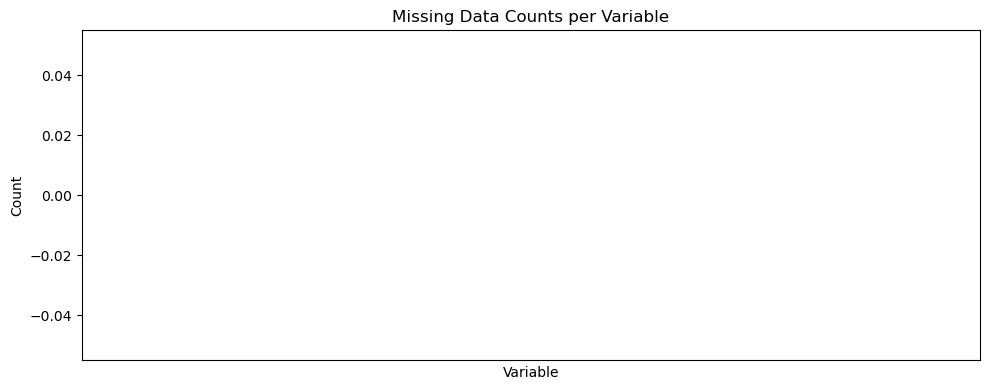

In [18]:
eda_helper_functions.plot_missing_info(train)

- we can also use missingno by just installing the package and pass the dataframe , it give us missing value bar graph

In [20]:
!pip install missingno

<Axes: >

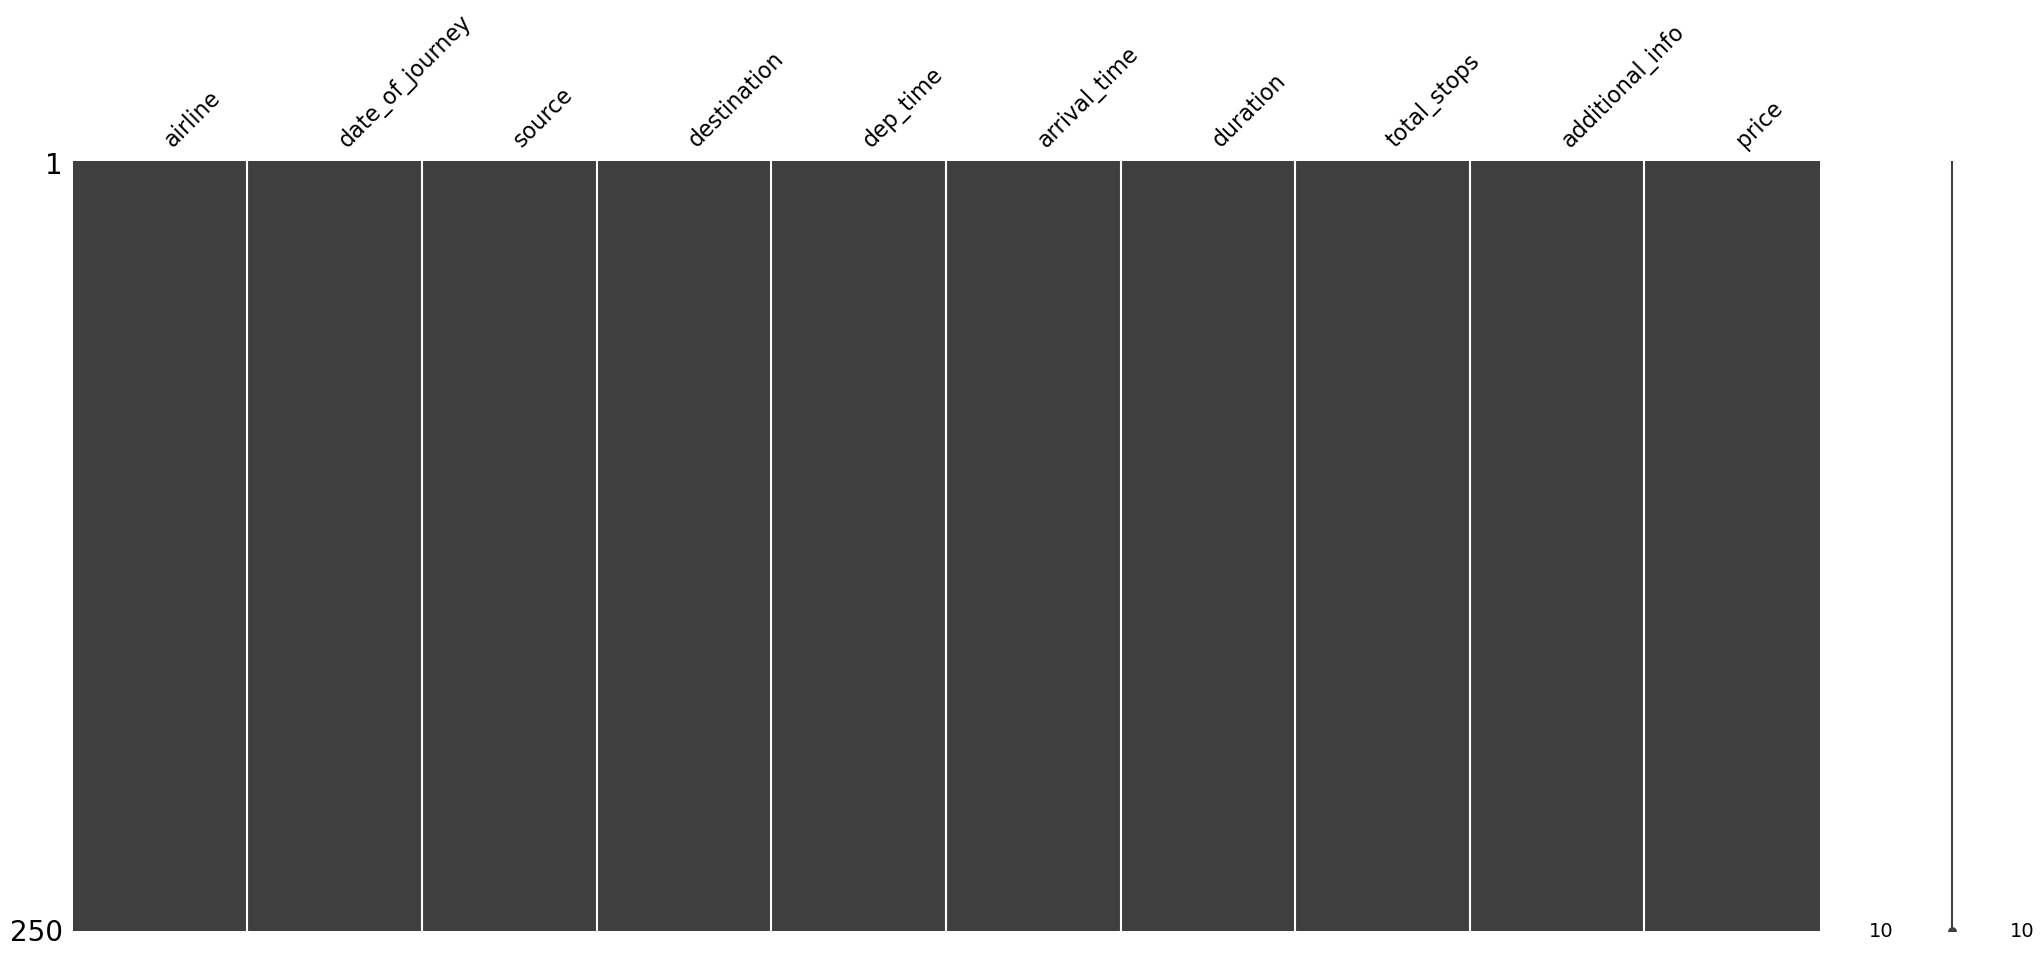

In [21]:
import missingno as msno
%matplotlib inline
msno.matrix(train.sample(250))

- here whiteness means missing value and blackness means complete(i.e no missing value)

C:\Users\Rahul-PC\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Rahul-PC\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

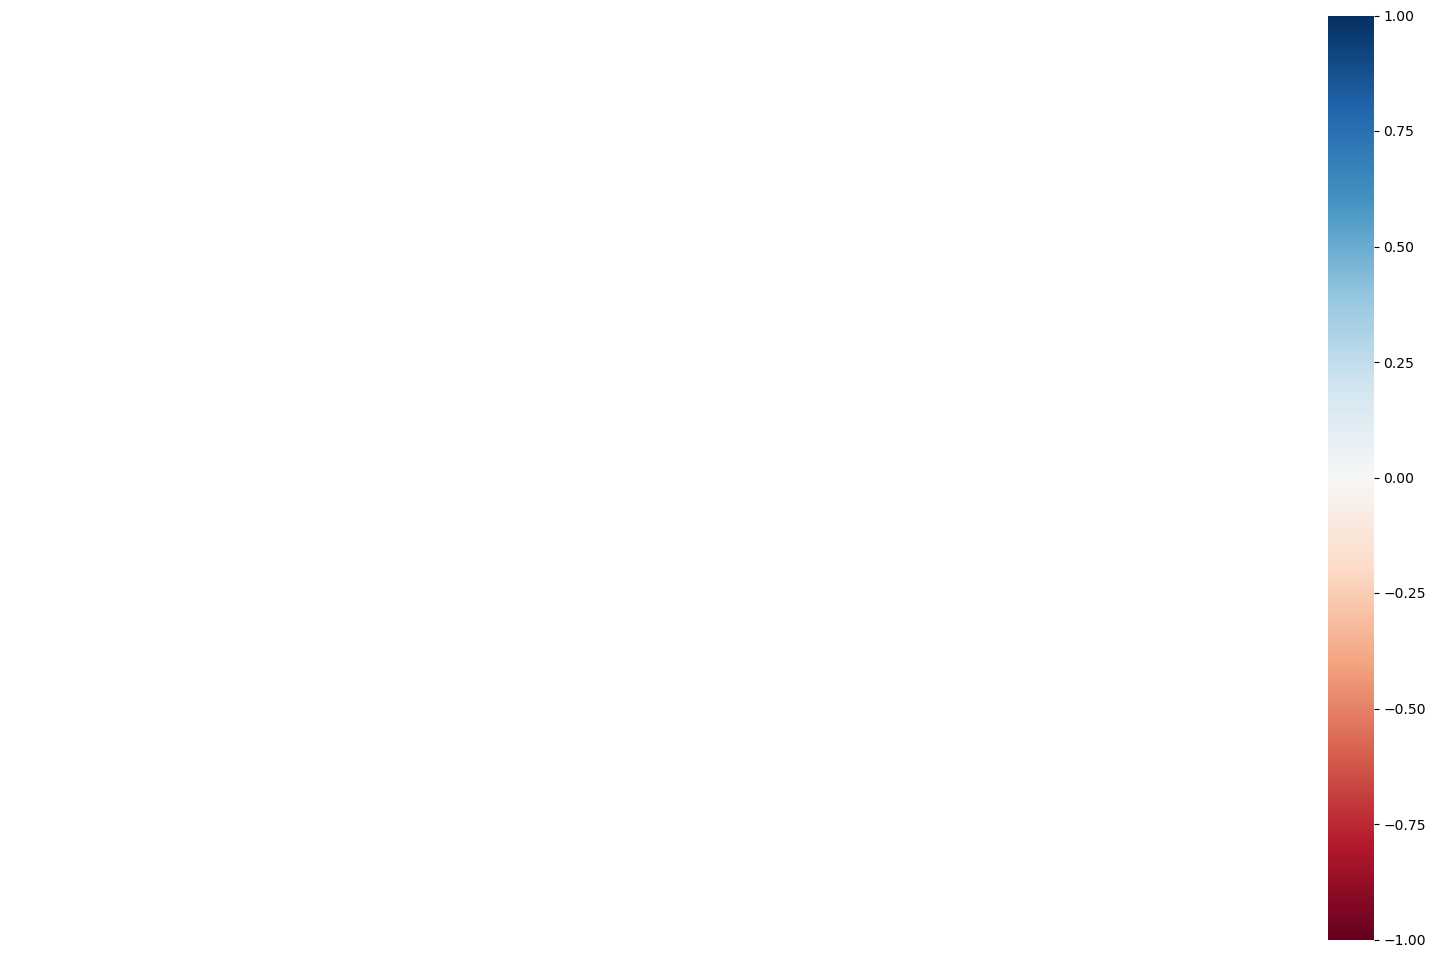

In [23]:
msno.heatmap(train)

- Heatmap Visualization: The msno.heatmap() function generates a heatmap, where each cell represents the correlation between missing values in two columns.

- If two columns have a high correlation (close to 1), it means that if one column is missing data, the other column is likely to have missing data as well.

- A correlation of 0 means that the missing values in one column have no relationship with the missing values in another column.

- A correlation close to -1 indicates a negative relationship, meaning if one column has missing data, the other is less likely to have missing data.

- here, in the above graph there is no any missing value so, missing value in one colum have no relationship with missing value in another column

## 5.High level analysis of outliers

- for this we use technique called isolation forest

- Isolation Forest is an unsupervised machine learning algorithm used primarily for anomaly detection or outlier detection. It is based on the idea that anomalies or outliers are few and different from the majority of the data, making them easier to isolate.

In [28]:
forest=IsolationForest(n_estimators=10,random_state=42) # this will only work on numeric data

In [29]:
(
    train
    .assign(outlier=forest.fit_predict(train.
                                       drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier==-1")
    #.duration
    #.describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-10-17 10:20:00,2024-10-17 11:50:00,90,0.0,In-flight meal not included,4995,-1
1,Air India,2019-05-18,Delhi,Cochin,2024-10-17 09:00:00,2024-10-17 07:40:00,1360,1.0,No Info,8372,-1
2,Air India,2019-06-12,Kolkata,Banglore,2024-10-17 09:10:00,2024-10-17 11:05:00,1555,2.0,No Info,6117,-1
3,Vistara,2019-04-01,Kolkata,Banglore,2024-10-17 20:20:00,2024-10-17 22:55:00,1595,1.0,No Info,7770,-1
4,Vistara,2019-06-06,Kolkata,Banglore,2024-10-17 17:00:00,2024-10-17 10:45:00,1065,1.0,No Info,9187,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-05-09,Mumbai,Hyderabad,2024-10-17 05:45:00,2024-10-17 07:15:00,90,0.0,No check-in baggage included,1965,-1
627,Air India,2019-03-21,Delhi,Cochin,2024-10-17 19:45:00,2024-10-17 19:15:00,1410,2.0,No Info,8236,-1
630,Air India,2019-05-12,Kolkata,Banglore,2024-10-17 10:00:00,2024-10-17 01:20:00,920,2.0,No Info,13243,-1
632,Jet Airways,2019-03-24,Kolkata,Banglore,2024-10-17 21:10:00,2024-10-17 22:35:00,1525,1.0,In-flight meal not included,10031,-1


## 6.pair-plot 

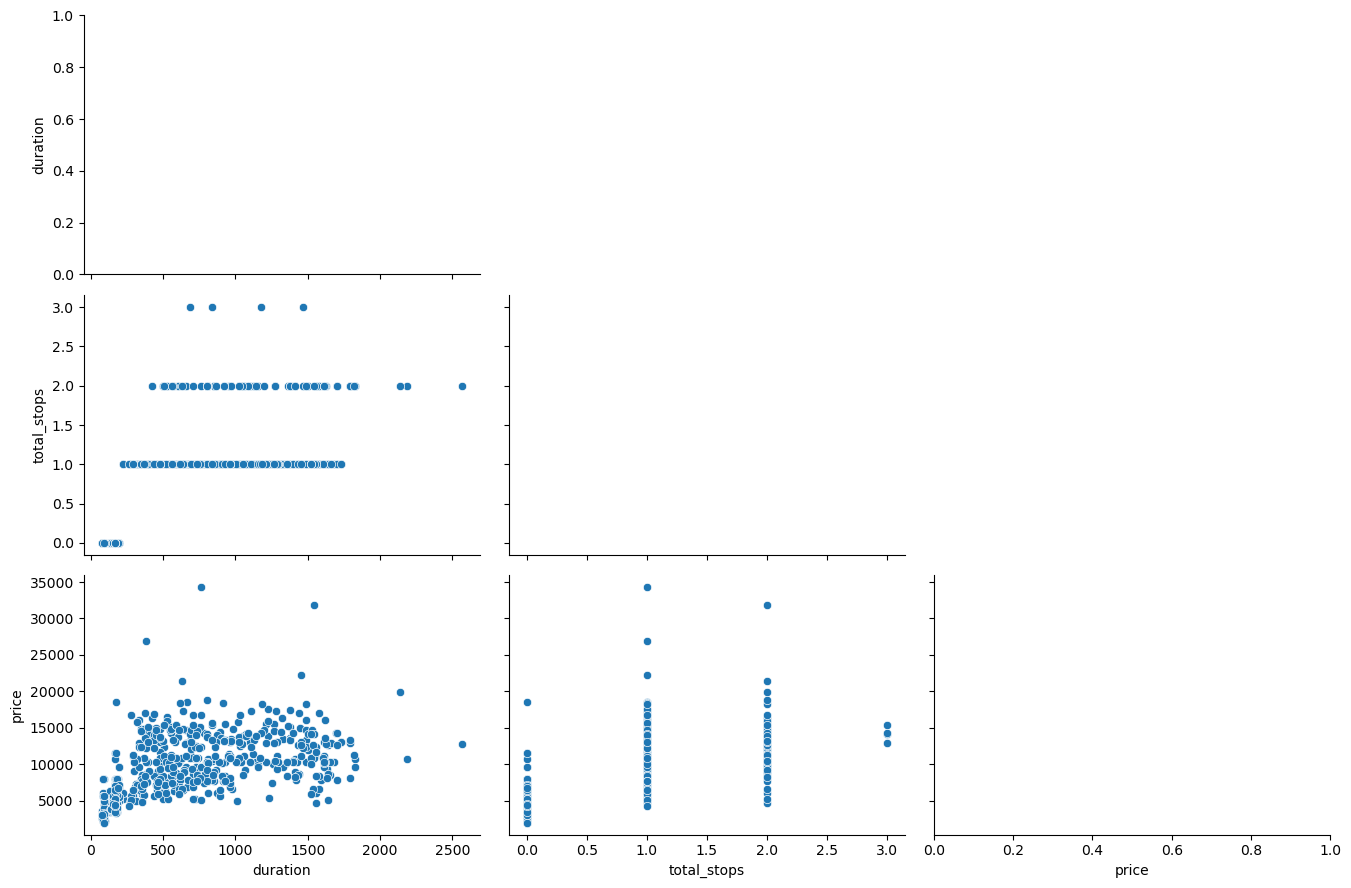

In [31]:
eda_helper_functions.pair_plots(train)

- here we not able to see the upper half but only see the lower half beacuse upper half and lower half have same diagram beacuse pair_plot are symmetrical about diagonal so, it only show us lower diagram.

## 7.Correlation analysis

C:\Users\Rahul-PC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


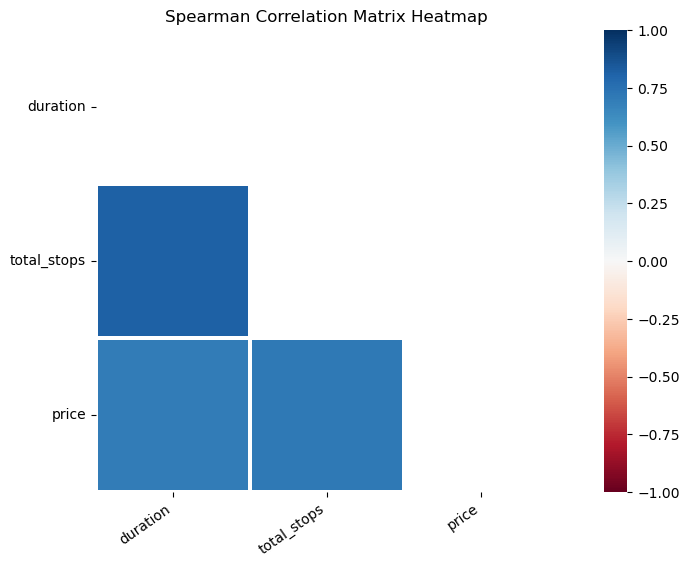

In [34]:
eda_helper_functions.correlation_heatmap(train,cmap="RdBu") # used for numerical data

In [35]:
train.corr(method="spearman",numeric_only=True) #used for numerical data

,duration,total_stops,price
duration,1.000000,0.816527,0.702017
total_stops,0.816527,1.000000,0.715720
price,0.702017,0.715720,1.000000


C:\Users\Rahul-PC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


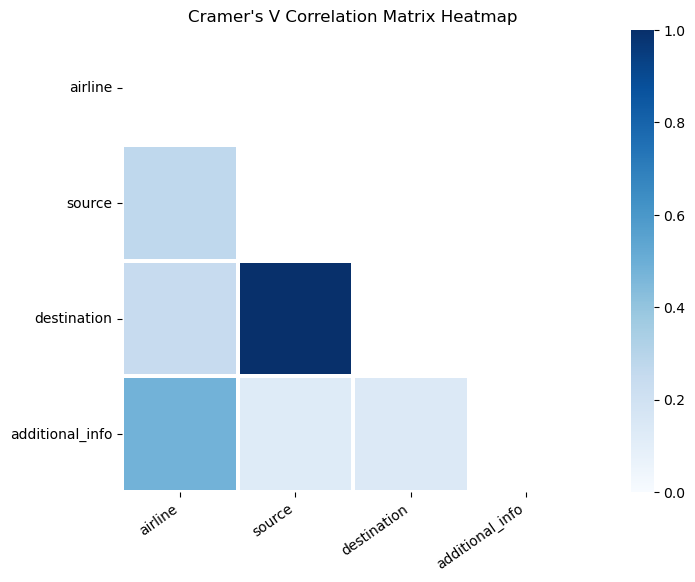

In [36]:
eda_helper_functions.cramersV_heatmap(train) #used for categorical data

- here source and destination may have overlapping value so, there is strong correlation among source and destination

## 8.Detailed analysis

In [39]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 Airline

In [41]:
train.airline

0            Jet Airways
1              Air India
2              Air India
3                Vistara
4                Vistara
             ...        
635             Air Asia
636          Jet Airways
637               Indigo
638    Multiple Carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [42]:
eda_helper_functions.cat_summary(train,"airline")

0            Jet Airways
1              Air India
2              Air India
3                Vistara
4                Vistara
             ...        
635             Air Asia
636          Jet Airways
637               Indigo
638    Multiple Carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,248


,count,percentage
category,,
Jet Airways,248,0.387500
Indigo,115,0.179688
Air India,102,0.159375
Multiple Carriers,68,0.106250
Spicejet,40,0.062500
Vistara,36,0.056250
Air Asia,18,0.028125
Goair,13,0.020313


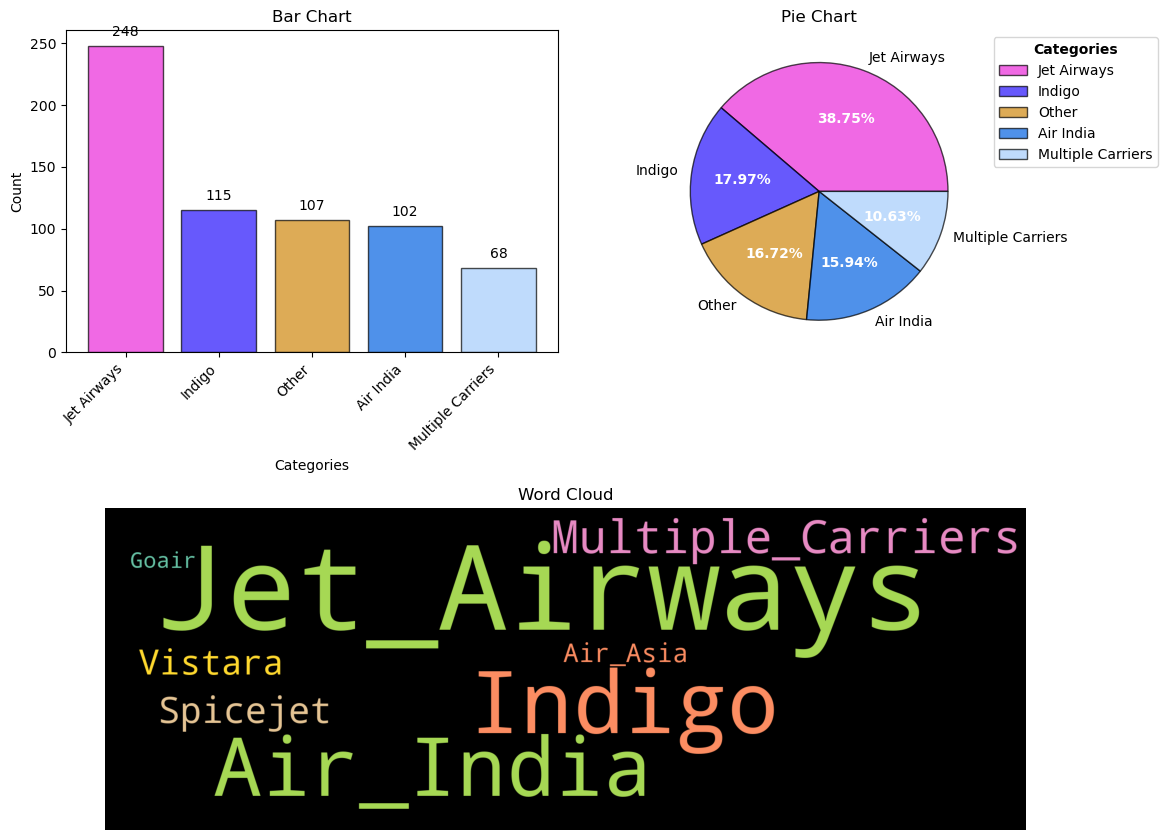

In [43]:
eda_helper_functions.cat_univar_plots(train,"airline",k=4) # here, k=4 help to show top 4 columns based on their counts and rest are groupby in one columns i.e multiple carriers

- wordcloud depicts figure of larger size for most occuring airlines and vice-versa

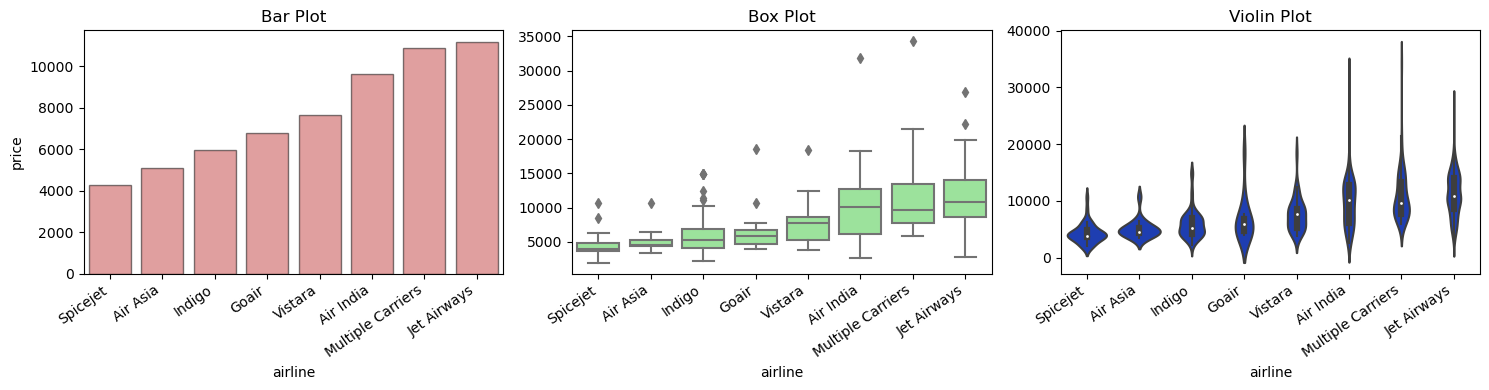

In [45]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"      
)

In [46]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 42.46553777098078
- p-value              : 3.970400260466922e-49
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 247.4640193359857
- p-value              : 9.600459786744093e-50
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


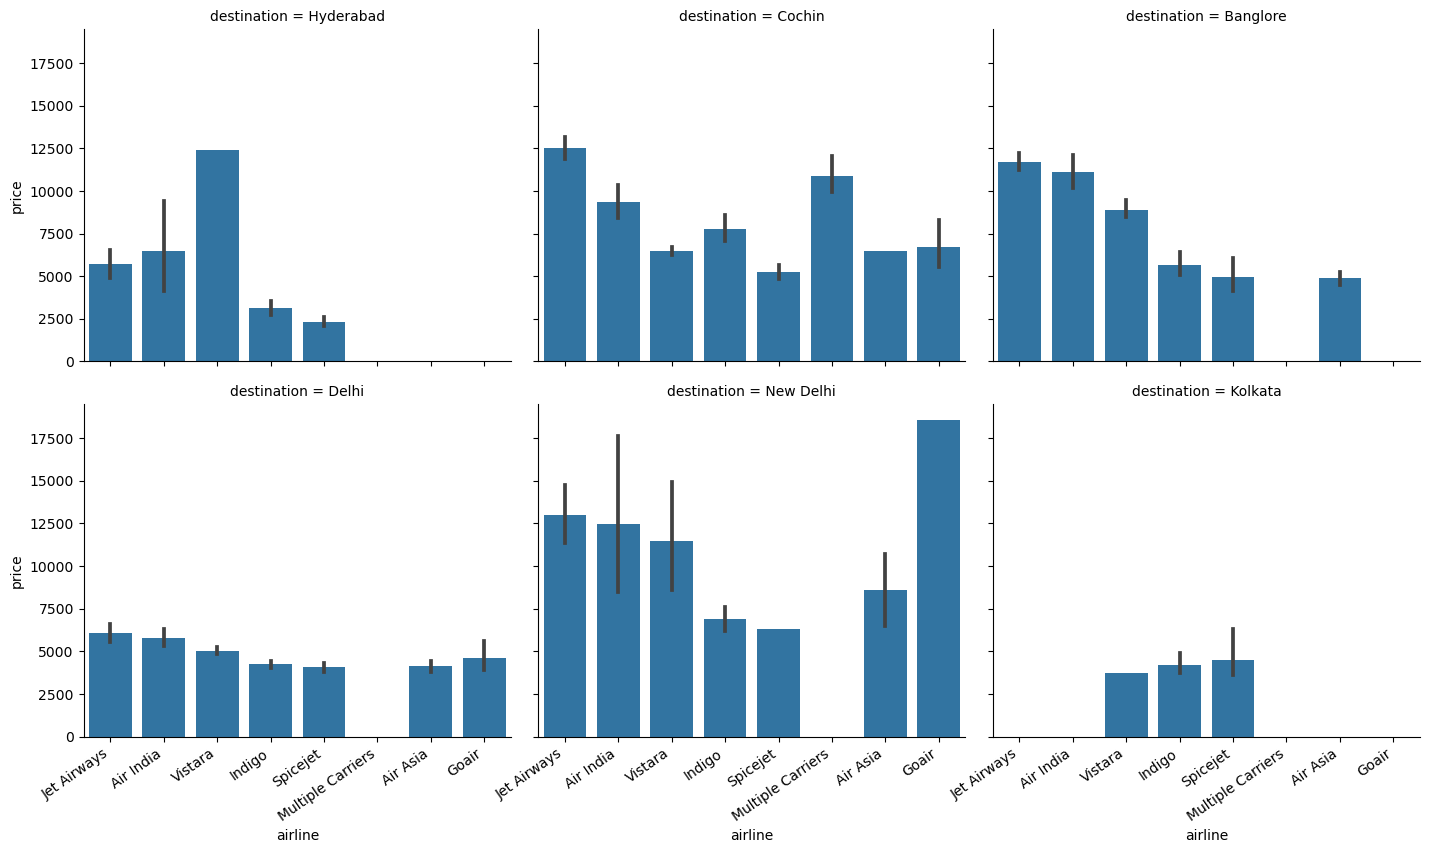

In [47]:
# multivarient plot

airline_grid=sns.FacetGrid(
    data=train,
    col="destination",
    height=4,
    aspect=1.2,
    col_wrap=3,
    sharex=True
)

airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## 8.2 date_of_journey

In [49]:
train.date_of_journey

0     2019-06-21
1     2019-05-18
2     2019-06-12
3     2019-04-01
4     2019-06-06
         ...    
635   2019-04-12
636   2019-05-09
637   2019-05-15
638   2019-05-15
639   2019-05-21
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

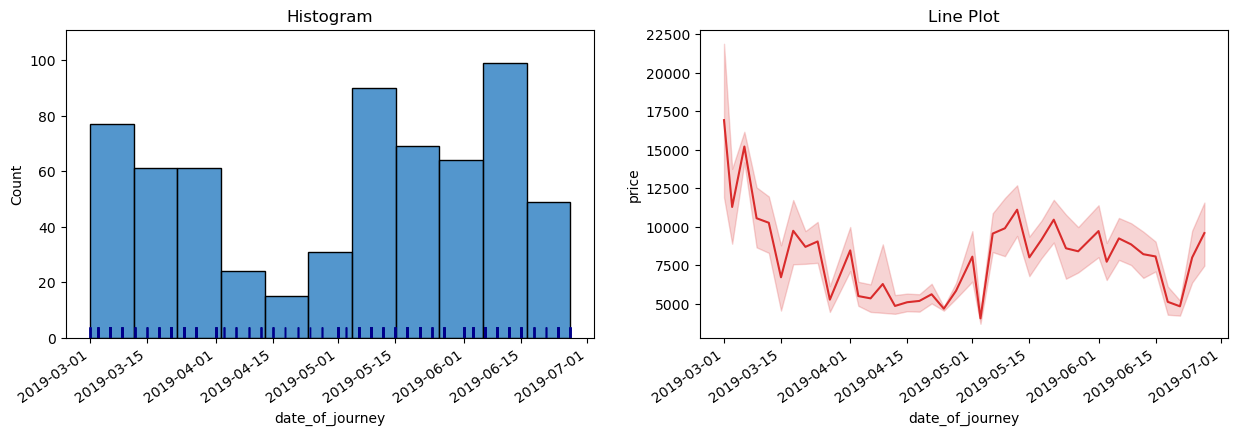

In [50]:
# univariate plots for date-time variables
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target ="price"
)

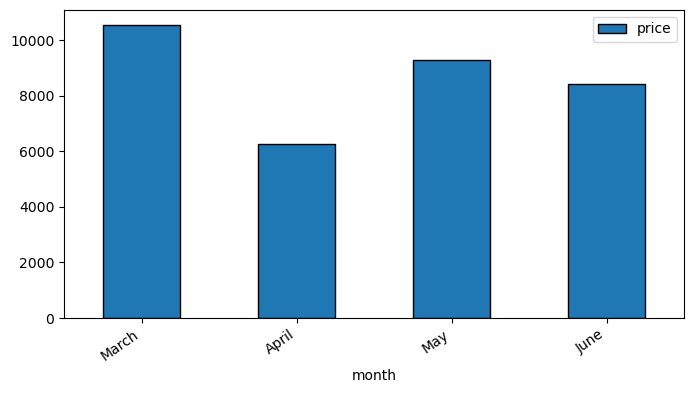

In [51]:
# bivarient anslysis as it anlysis on time and price
# we now find the average price per month
#grouper is mainly used in datetime columns to get precise anlysis on monthly basis, weekly basis
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)

ax=plt.gca() # gca= get current axis
eda_helper_functions.rotate_xlabels(ax)

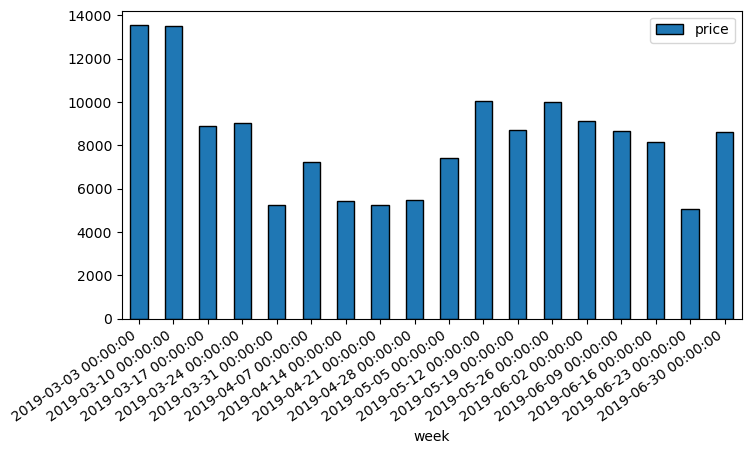

In [52]:
# we now find the average price per weekly, same code as above but change only freq="W"
# # bivarient anslysis as it anlysis on time and price.
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="W"))
    .price.mean()
    .to_frame()
    #.set_axis(["Monday","Tuesday","Wednesday","Thursday","Friday", "Saturday", "Sunday"],axis=0)
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)

ax=plt.gca() # gca= get current axis
eda_helper_functions.rotate_xlabels(ax)

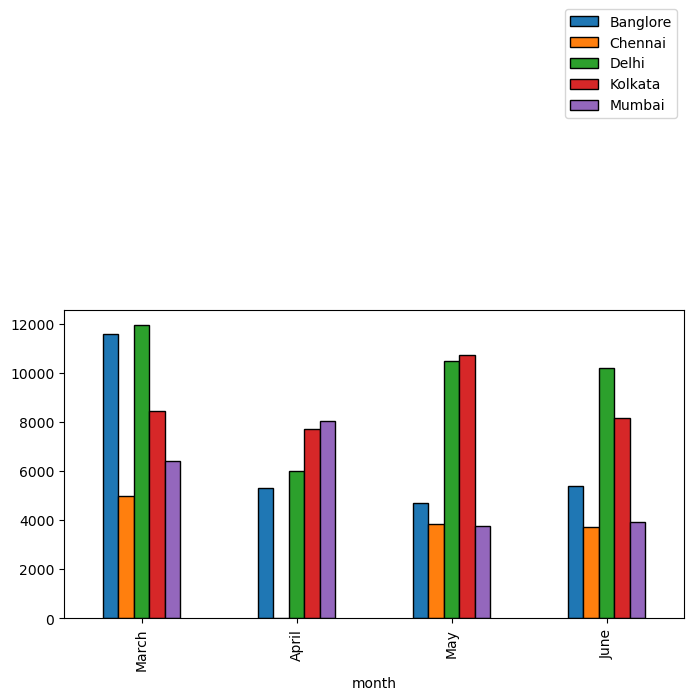

In [53]:
# Multivarient analysis: we try to find in each month march ,april,may, june what is the average price of each airlines 
# so, here we anlysis on month, price and airlines so, it is multivarient analysis

(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
ax=plt.gca()
ax.legend(
    loc="upper right",
    bbox_to_anchor=(
        1,2
    )
)



## 8.3 dep_time

In [55]:
train.dep_time

0     2024-10-17 10:20:00
1     2024-10-17 09:00:00
2     2024-10-17 09:10:00
3     2024-10-17 20:20:00
4     2024-10-17 17:00:00
              ...        
635   2024-10-17 04:55:00
636   2024-10-17 09:35:00
637   2024-10-17 06:05:00
638   2024-10-17 08:45:00
639   2024-10-17 20:00:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

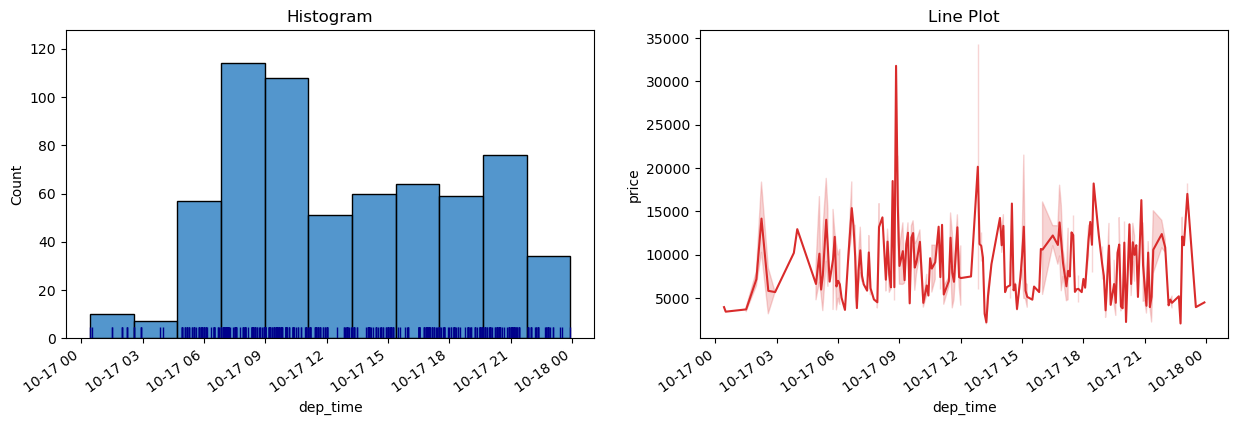

In [56]:
# univarient plot analysis for dep_time
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

In [57]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-10-17 10:20:00,2024-10-17 11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,2024-10-17 09:00:00,2024-10-17 07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,2024-10-17 09:10:00,2024-10-17 11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,2024-10-17 20:20:00,2024-10-17 22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,2024-10-17 17:00:00,2024-10-17 10:45:00,1065,1.0,No Info,9187


- from 7 am to 12 pm most flight are booked

 - from 12 am to 3 am , very less flight are booked

- histogram has only information  x-axis as date and hour only (10-16 00 meand 16 oct 12 am)

In [61]:
(  #here, first we convert dep_time to hour to access hour and then using pipe to convert the range of hour to morning, afternoon, evening, night
    train
    .dep_time
    .dt.hour    # dt.hour is like/similar to str.tolower or str.toupper function
    .pipe(lambda ser: pd.Series(np.select([ser.between(4,12,inclusive="left"),
                                ser.between(12,16,inclusive="left"),
                                ser.between(16,20,inclusive="left")],
                               ["morning",
                                "afternoon",
                                "evening",
                                ] ,
                               default = "night")))      # if we use pipe method on series then it take function's input as series only
)

0      morning
1      morning
2      morning
3        night
4      evening
        ...   
635    morning
636    morning
637    morning
638    morning
639      night
Length: 640, dtype: object

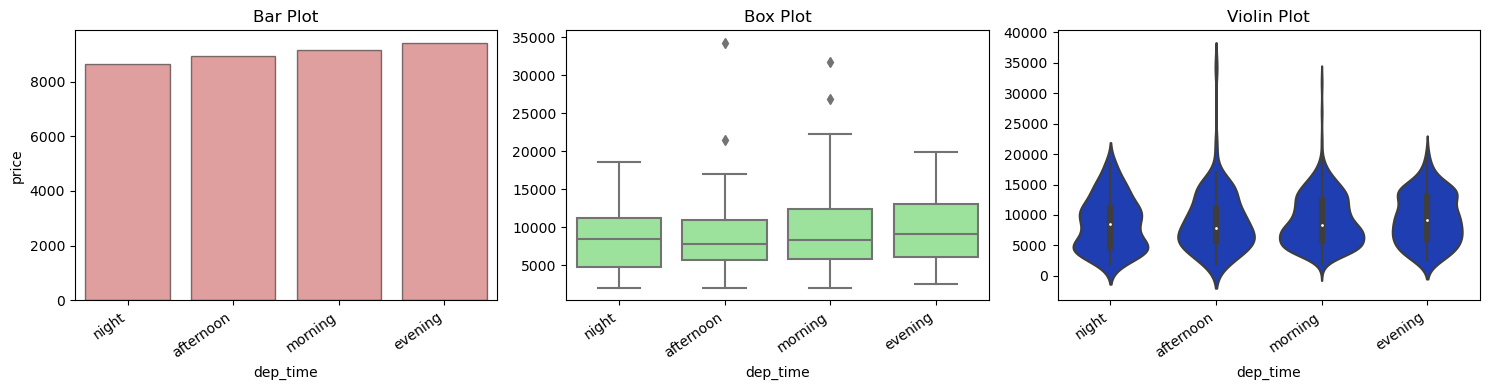

In [62]:
# temprorary change the column of dep_time using assign attribute
# select function took ([condition1, condition2, condition3.....condinition n],[answer1,answer2,answer3,......answern],defaul="defaul_condition"
(
    train
    .assign(dep_time= lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                   df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                   df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                   ["morning","afternoon","evening"],
                   default = "night")
        
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
    
)


## 8.4 duration

In [64]:
# duration is a numeric columns
train.duration

0        90
1      1360
2      1555
3      1595
4      1065
       ... 
635     170
636     690
637     165
638     735
639     960
Name: duration, Length: 640, dtype: int64

In [65]:
eda_helper_functions.num_summary(train,"duration")

0        90
1      1360
2      1555
3      1595
4      1065
       ... 
635     170
636     690
637     165
638     735
639     960
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,150.00
25,175.00
50,505.00
75,956.25
90,1456.50
95,1610.25
99,1795.00


,value
mean,639.773438
trimmed mean (5%),609.296875
trimmed mean (10%),581.650391
median,505.000000


,value
var,252052.100389
std,502.047906
IQR,781.250000
mad,335.000000
coef_variance,0.784728


,value
skewness,0.817873
kurtosis,-0.304506


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.780735990586756e-21
Test Statistic       : 0.8889472484588623
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.671347917330877
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [66]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,2024-10-17 10:20:00,2024-10-17 11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,2024-10-17 09:00:00,2024-10-17 07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,2024-10-17 09:10:00,2024-10-17 11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,2024-10-17 20:20:00,2024-10-17 22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,2024-10-17 17:00:00,2024-10-17 10:45:00,1065,1.0,No Info,9187


In [67]:
train.duration.quantile([0.25,0.5,0.75])  #compute the 25th percentile (1st quartile), 50th percentile (median), and 75th percentile (3rd quartile) of the duration column.

0.25    175.00
0.50    505.00
0.75    956.25
Name: duration, dtype: float64

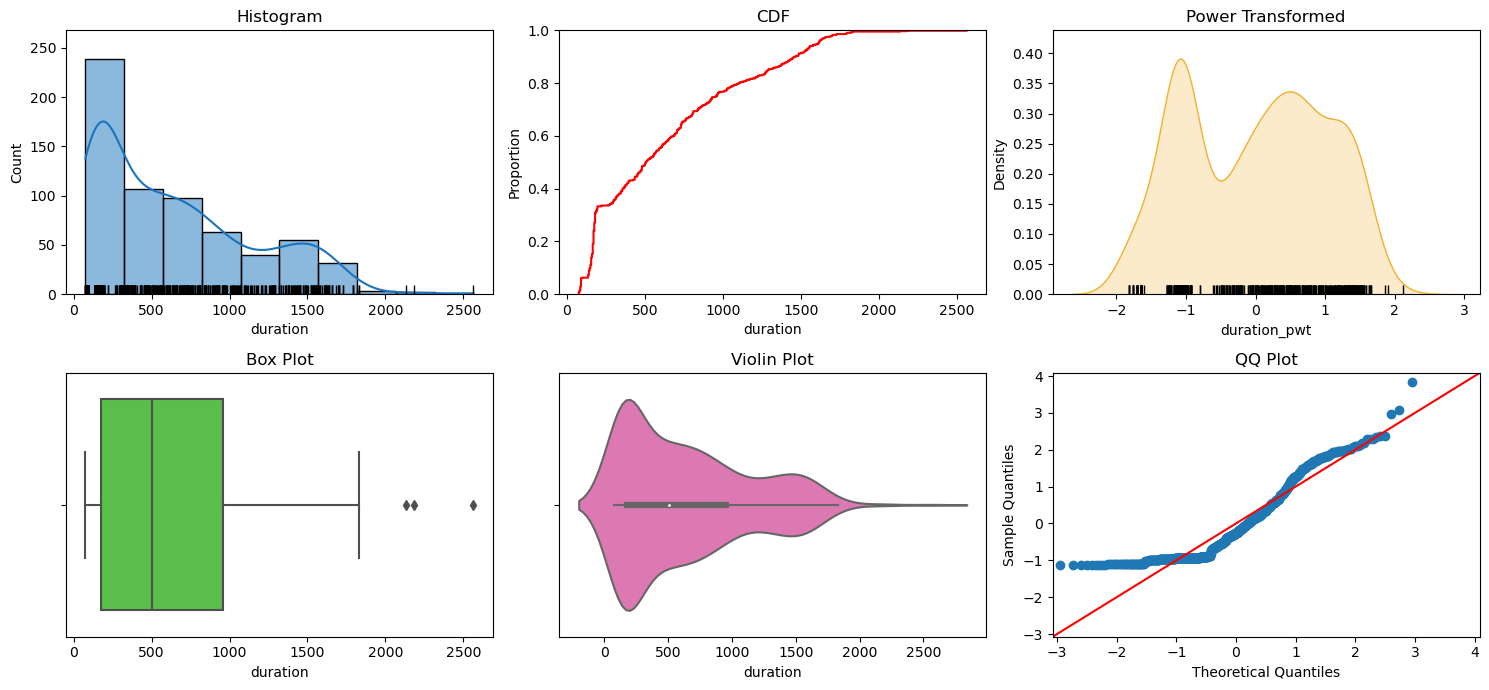

In [68]:
# convert the above number(num_summary ka ) into graph

eda_helper_functions.num_univar_plots(train,"duration")

- power tranformed is used to make the data symmetry by finding exponent of each columns

- sklearn has pre-build library for power transformed

- A Q-Q plot (quantile-quantile plot) is a graphical tool used to assess whether a dataset follows a particular distribution, most commonly the normal distribution. It helps in comparing the distribution of a dataset with a theoretical distribution by plotting their quantiles against each other. 
- in qq plot, if the datapoint is fall on shown line(red) then we can say that give feature is uniformaly distributed or following theoritical distribution. but in our case points are not fall on red line.so, here the feature is not uniformly distributed/ following theoritical distribution

- normal graph and symmetry graph are not same....check the eda pdf for clarification

TypeError: Got both 'edgecolor' and 'edgecolors', which are aliases of one another

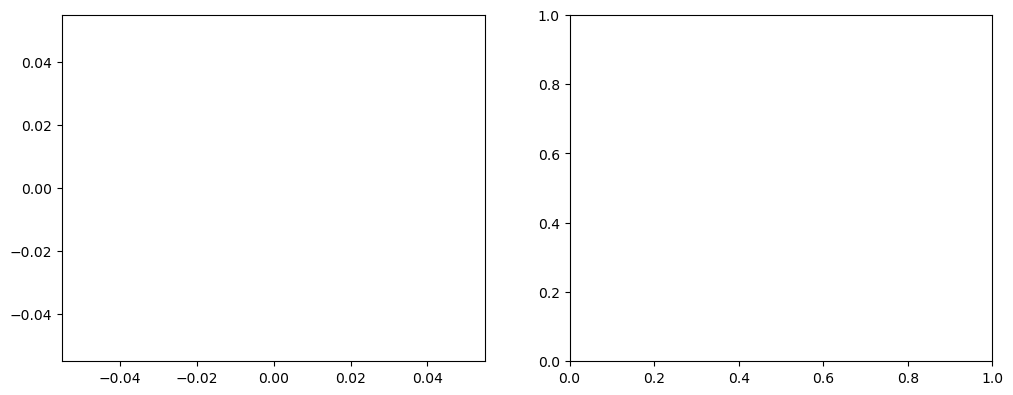

In [73]:
# bivariant analysis of duration feature
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

<Axes: xlabel='duration', ylabel='price'>

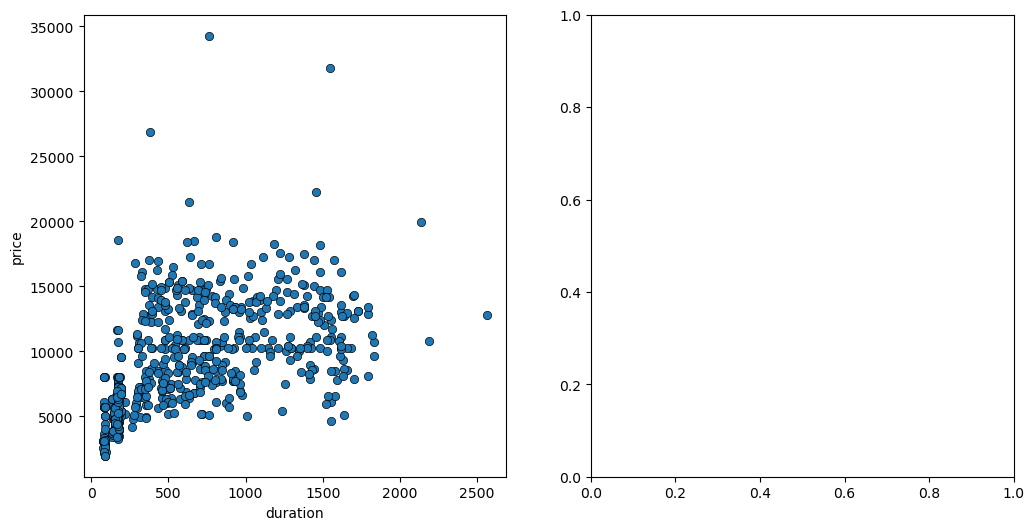

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# scatter plot
sns.scatterplot(
    data=train,  # corrected the argument to pass data explicitly
    x="duration",
    y="price",
    ax=axes[0],  # Now axes[0] is defined
    edgecolor="black",  # changed from edgecolors to edgecolor
)

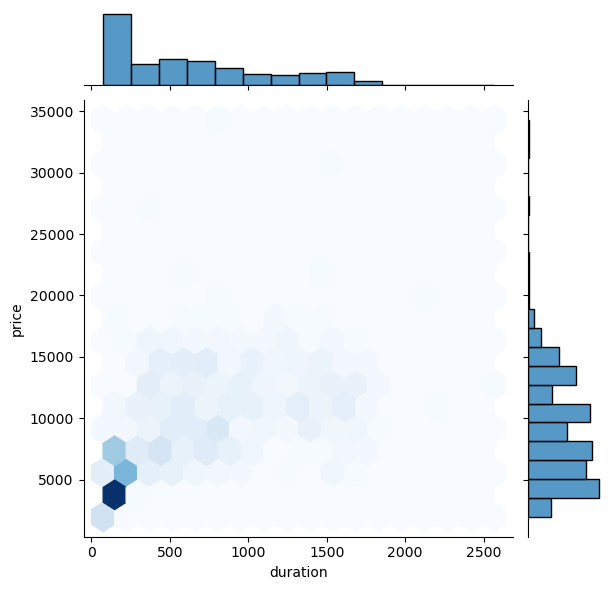

In [76]:
#method-1
sns.jointplot(x="duration", y="price", data=train, kind="hex", cmap="Blues")

- jo bhi numeric value hote usko hexbin plot divides karta hi in  bins of different ranges

In [78]:
#hypothesis testing
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5542220697543213
- p-value              : 8.234740030806465e-53
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7020165273730767
- p-value              : 3.954255142414078e-96
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


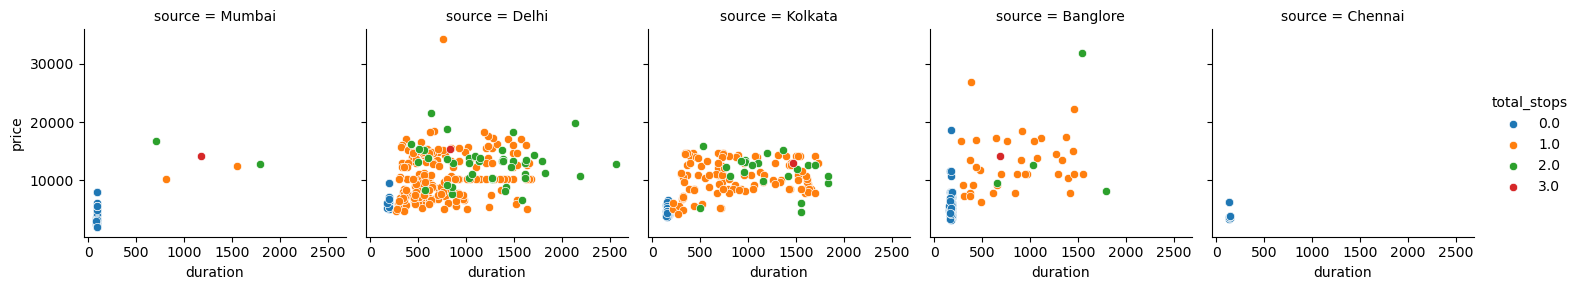

In [80]:
# multivarient analysis
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
    
)

duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend()

In [84]:
eda_helper_functions.get_iqr_outliers(train,"duration") # this give information about outlier in duration columns 

Lower Limit : -996.875
Upper Limit : 2128.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
377,Jet Airways,2019-03-06,Delhi,Cochin,2024-10-17 16:50:00,2024-10-17 04:25:00,2135,2.0,No Info,19907
294,Air India,2019-03-21,Delhi,Cochin,2024-10-17 06:50:00,2024-10-17 19:15:00,2185,2.0,No Info,10756
284,Jet Airways,2019-03-21,Delhi,Cochin,2024-10-17 09:40:00,2024-10-17 04:25:00,2565,2.0,No Info,12819


## 9.Automated EDA

- when we have columns>100 then we use automated eda
- libraries we use for automated eda is Pandas Profilling(ydata-profilling) , Sweetviz, Autoviz, D-tale

In [1]:
pip install --upgrade notebook

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ydata_profiling import ProfileReport

In [3]:
pip install --upgrade jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [4]:
report=ProfileReport(train,title="Profile report")
report

NameError: name 'train' is not defined

In [ ]:
report.to_file(output_file="output.html")